In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import open3d as o3d
import os, sys, glob
import laspy as lp
# import pylas as pl

In [14]:
# define the path of the data stored
datapath = '../data/real'

las = lp.read(os.path.join(datapath, 'kiwi.laz'))

In [15]:
las.header.point_count

33770661

In [16]:
las.header.version

Version(major=1, minor=4)

In [17]:
list(las.point_format.dimension_names)

['X',
 'Y',
 'Z',
 'intensity',
 'return_number',
 'number_of_returns',
 'scan_direction_flag',
 'edge_of_flight_line',
 'classification',
 'synthetic',
 'key_point',
 'withheld',
 'scan_angle_rank',
 'user_data',
 'point_source_id',
 'gps_time',
 'red',
 'green',
 'blue',
 'Ring',
 'Range']

In [18]:
points = np.vstack((las.x, las.y, las.z)).transpose()
colors = np.vstack((las.red, las.green, las.blue)).transpose()

In [19]:
df = pd.DataFrame(points, columns=['x', 'y', 'z'])
df.head()

,x,y,z
0,-2.134205,0.588209,0.344444
1,-2.143205,0.611209,0.419444
2,-1.683205,0.428209,0.375444
3,-1.708205,0.462209,0.443444
4,-1.829205,0.532209,0.548444


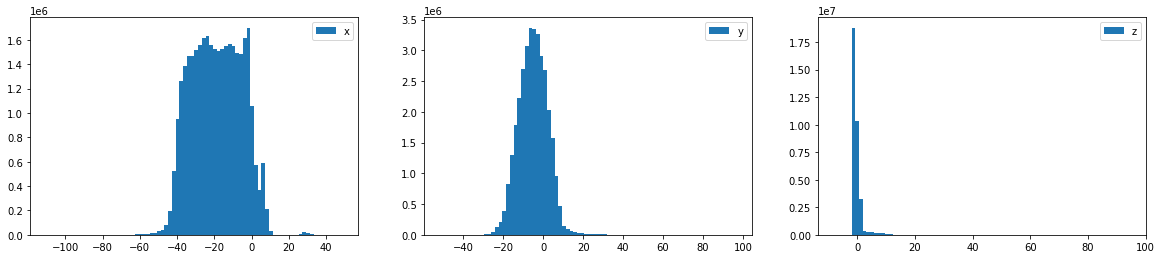

In [9]:
fig=plt.figure(figsize=(20,4))
for num, (key, val) in enumerate(df.items()):
    plt.subplot(1,3,num+1)
    plt.hist(val, 80, label=key)
    plt.legend()

In [21]:
# Downsampling
factor=50
lite = points[::factor]
lite.shape

(675414, 3)

In [22]:
# lims
lims={}
coords = {i:lite.transpose()[num] for i,num in zip(['x','y','z'], [0,1,2])}
for key, val in coords.items():
    lims[key] = np.percentile(val, (3,97))
    print(key, lims[key])

x [-40.52620453   4.76079547]
y [-18.00879143   7.40920857]
z [-1.72455628  3.48844372]


In [23]:
df1 = pd.DataFrame(lite, columns=['x', 'y', 'z'])

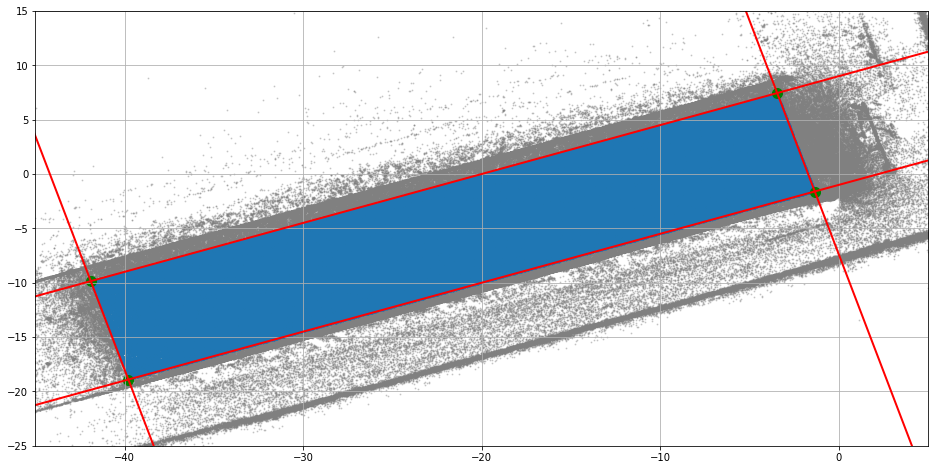

In [33]:
plt.figure(figsize=(16, 8))
x = np.linspace(-50, 10, 20)
keep = (df1['y'] > 0.45*df1['x'] - 1.0) & (df1['y'] < 0.45*df1['x'] + 9)
keep &= (df1['y'] < -4.3*df1['x'] - 7.4) & (df1['y'] > -4.3*df1['x'] - 190)
plt.scatter(df1['x'], df1['y'], s=1, c='gray', alpha=0.3)
plt.scatter(df1['x'][keep], df1['y'][keep], s=1)
plt.plot(x, 0.45*x - 1.0, lw=2, c='r')
plt.plot(x, 0.45*x + 9, lw=2, c='r')
plt.plot(x, -4.3*x - 7.4, lw=2, c='r')
plt.plot(x, -4.3*x - 190, lw=2, c='r')

px = np.array([-1.35, -3.45, -39.8, -41.9])
py = np.array([-1.61, 7.45, -18.91, -9.86])
plt.scatter(px, py, s=100, c='g')

plt.grid()

plt.xlim(-45, 5)
plt.ylim(-25,15)

# plt.xlim(4, 10)
# plt.ylim(2,14)

plt.show()


In [12]:
np.round(0.45*(-39.8) - 1, 2)

-18.91

In [13]:
np.round(0.45*(-41.9) + 9, 2)

-9.86

In [61]:
y1, y2 = 2, 14
x1, x2 = 7.8, 5
m = np.abs((y2-y1)/(x2-x1))
c = 14 -m*5
print(m,c)

4.285714285714286 -7.428571428571427


In [83]:
zlim = np.percentile(df1['z'], (0.1, 96))
print(zlim)

[-1.95055628  2.12244372]


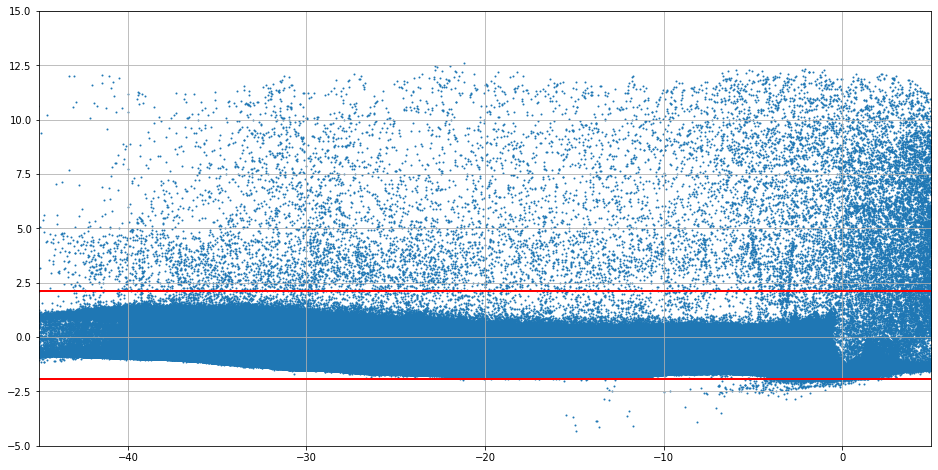

In [84]:
plt.figure(figsize=(16, 8))
x = np.linspace(-50, 10, 20)
plt.scatter(df1['x'], df1['z'], s=1)
# plt.plot(x, 0.45*x - 1.0, lw=2, c='r')
plt.axhline(zlim[0], lw=2, c='r')
plt.axhline(zlim[1], lw=2, c='r')
plt.grid()

plt.xlim(-45, 5)
plt.ylim(-5,15)

plt.show()

In [103]:
# Downsampling
factor=10
lite = points[::factor]
lite.shape

coords = {i:lite.transpose()[num] for i,num in zip(['x','y','z'], [0,1,2])}

keep = (coords['y'] > 0.45*coords['x'] - 1.0) & (coords['y'] < 0.45*coords['x'] + 9)
keep &= (coords['y'] < -4.3*coords['x'] - 7.4) & (coords['y'] > -4.3*coords['x'] - 190)
keep &= (coords['z'] < 2.5)

lite = lite[keep]
lite.shape

(1846980, 3)

In [104]:
!rm ../data/real/kiwi_lite_*.pcd

In [105]:
# chunks
pcd = o3d.geometry.PointCloud()

# chunks = {}
n = 300000
for i in range(0, len(lite), n):
#     chunks[str(i)] = lite[i:i + n]
    pcd.points = o3d.utility.Vector3dVector(lite[i:i + n])
    o3d.io.write_point_cloud(os.path.join(datapath, 'kiwi_lite_%s.pcd'%(str(i))), pcd)


In [1]:
!pcl_viewer ../data/real/kiwi_lite_*.pcd

The viewer window provides interactive commands; for help, press 'h' or 'H' from within the window.
> Loading ../data/real/kiwi_lite_0.pcd [PCLVisualizer::setUseVbos] Has no effect when OpenGL version is ≥ 2
[done, 1235.75 ms : 300000 points]
Available dimensions: x y z
> Loading ../data/real/kiwi_lite_0.slice.pcd [done, 11.0144 ms : 18610 points]
Available dimensions: x y z
> Loading ../data/real/kiwi_lite_0.tile.downsample.kiwi_lite_0.pcd [done, 65.9746 ms : 206192 points]
Available dimensions: x y z
> Loading ../data/real/kiwi_lite_1200000.pcd [done, 84.73 ms : 300000 points]
Available dimensions: x y z
> Loading ../data/real/kiwi_lite_1200000.tile.downsample.kiwi_lite_1200000.pcd [done, 35.1744 ms : 196112 points]
Available dimensions: x y z
> Loading ../data/real/kiwi_lite_1500000.pcd [done, 84.7084 ms : 300000 points]
Available dimensions: x y z
> Loading ../data/real/kiwi_lite_1500000.tile.downsample.kiwi_lite_1500000.pcd [done, 59.0499 ms : 202464 points]
Available dimensions: 

## Downsampling (optional)


For our example using the mock up point cloud data, we need to do the downsampling in order to further steeps works.

In [111]:
!rm ../data/real/kiwi_*.tile.downsample.kiwi_*.pcd

In [112]:
!downsample 0.04 ../data/real/kiwi_lite_*.pcd
!mv kiwi_lite_*.tile.downsample.kiwi_lite_*.pcd ../data/real/

In [113]:
!pcl_viewer ../data/real/kiwi_lite_*.tile.downsample.kiwi_lite_*.pcd

The viewer window provides interactive commands; for help, press 'h' or 'H' from within the window.
> Loading ../data/real/kiwi_lite_0.tile.downsample.kiwi_lite_0.pcd [PCLVisualizer::setUseVbos] Has no effect when OpenGL version is ≥ 2
[done, 409.169 ms : 206192 points]
Available dimensions: x y z
> Loading ../data/real/kiwi_lite_1200000.tile.downsample.kiwi_lite_1200000.pcd [done, 40.8315 ms : 196112 points]
Available dimensions: x y z
> Loading ../data/real/kiwi_lite_1500000.tile.downsample.kiwi_lite_1500000.pcd [done, 45.2274 ms : 202464 points]
Available dimensions: x y z
> Loading ../data/real/kiwi_lite_1800000.tile.downsample.kiwi_lite_1800000.pcd [done, 16.1879 ms : 36303 points]
Available dimensions: x y z
> Loading ../data/real/kiwi_lite_300000.tile.downsample.kiwi_lite_300000.pcd [done, 219.217 ms : 209976 points]
Available dimensions: x y z
> Loading ../data/real/kiwi_lite_600000.tile.downsample.kiwi_lite_600000.pcd [done, 96.2631 ms : 210174 points]
Available dimensions: x 

## Digital terrain model (DTM)

The first principal step of treeseg is to identify the individual trees in the larger-area point cloud. This identification is undertaken on a slice segmented from the larger-area point cloud along the xy-plane. To generate this slice at some defined height above-ground whilst adjusting for topography, it is necessary to construct an underlying digital terrain model (DTM). Both this DTM, and the slice can be generated using:

```console
!getdtmslice 2 2.5 0.1 10 ../data/mock/scan*.tile.downsample.scan*.pcd > ../data/mock/scan.dtm.dat
```

Where the inputs are: 1) the resolution of the DTM (m), 2) the percentile of the z-coordinates of the points inside each DTM grid which is considered to constitute the ground (this is used, rather than the absolute minimum, to provide more robust results in noisy point clouds), 3) the minimum height of the slice above-ground (m), 4) the maximum height of the slice above-ground (m), and 5) the downsampled tiles constituting the larger-area point cloud.



In [142]:
!getdtmslice 2 2.5 0.5 1 ../data/real/kiwi_lite_*.tile.downsample.kiwi_lite_*.pcd > ../data/real/scan.dtm.dat

In [143]:
!rm ../data/real/kiwi_lite_*.slice.pcd
!mv kiwi_lite_*.slice.pcd ../data/real/

In [144]:
!ls ../data/real/kiwi_lite_*.slice.pcd

../data/real/kiwi_lite_0.slice.pcd


In [145]:
!pcl_viewer ../data/real/kiwi_lite_*.slice.pcd

The viewer window provides interactive commands; for help, press 'h' or 'H' from within the window.
> Loading ../data/real/kiwi_lite_0.slice.pcd [PCLVisualizer::setUseVbos] Has no effect when OpenGL version is ≥ 2
[done, 220.909 ms : 18610 points]
Available dimensions: x y z


## Identifying the stems

Individual tree stems are then identified in this slice across the larger-area point cloud through four steps:

Euclidean clustering: the slice is organised into individual clusters, based on the spatial distances between points.
Region-based segmentation: these clusters are further reduced to regions, based on the properties of their underlying surfaces (themselves inferred from point normals).
Shape fitting: RANSAC methods are used to fit cylinders to each region, and fit diagnostics are used to determine the likelihood of the underlying surface being a stem.
Principal component analysis: the angle between the principal components of each region and the ground are calculated, with regions broadly perpendicular to the ground deemed to be stems.
These steps are implemented in the findstems executable, which can be called:

```console

```

In [118]:
#
files = {}

for file in glob.glob(os.path.join(datapath, 'kiwi_lite_*.slice.pcd')):
    pcd_load = o3d.io.read_point_cloud(file)
    # convert Open3D.o3d.geometry.PointCloud to numpy array
    xyz_load = np.asarray(pcd_load.points)
    files[file.split('/')[-1]] = xyz_load

# concatenate all data
df = np.concatenate(list(files.values()))
df.shape

pcds = pd.DataFrame(df, columns=['x', 'y', 'z'])
# pcds

xmin, xmax = pcds['x'].min(), pcds['x'].max()
ymin, ymax = pcds['y'].min(), pcds['y'].max()
print(xmin, xmax, ymin, ymax)
np.savetxt(os.path.join(datapath, 'scan.coords.dat'), [xmin, xmax, ymin, ymax], fmt='%.2f', delimiter='\s')

# plt.figure(figsize=(15,5))
# for num, (key, val) in enumerate(pcds.items()):
#     plt.subplot(1,3,num+1)
#     plt.hist(val, 80, label=key)

-41.88420486450195 -1.3552045822143555 -18.874290466308594 7.423208713531494


In [157]:
!findstems 17 0.1 1 ../data/real/scan.coords.dat ../data/real/kiwi_lite_*.slice.pcd
# ../data/mock_vel/scan0*.tile.downsample.slice.pcd

Reading slice: complete
Cluster extraction: kiwi_lite_0.intermediate.slice.clusters.pcd | 50
Region-based segmentation: kiwi_lite_0.intermediate.slice.clusters.regions.pcd | 49
RANSAC cylinder fits: libc++abi.dylib: terminating with uncaught exception of type pcl::IOException: : [pcl::PCDWriter::writeBinary] Input point cloud has no data!


In [2]:
!pcl_viewer kiwi_lite_*.intermediate.slice.clusters.pcd

The viewer window provides interactive commands; for help, press 'h' or 'H' from within the window.
> Loading kiwi_lite_0.intermediate.slice.clusters.pcd [PCLVisualizer::setUseVbos] Has no effect when OpenGL version is ≥ 2
[done, 710.469 ms : 16415 points]
Available dimensions: x y z rgb


In [121]:
!pcl_viewer kiwi_lite*.intermediate.slice.clusters.regions.pcd

The viewer window provides interactive commands; for help, press 'h' or 'H' from within the window.
> Loading kiwi_lite_0.intermediate.slice.clusters.regions.pcd [PCLVisualizer::setUseVbos] Has no effect when OpenGL version is ≥ 2
[done, 1092.61 ms : 827238 points]
Available dimensions: x y z rgb


In [183]:
!pcl_viewer scan0*.cluster.*.pcd

The viewer window provides interactive commands; for help, press 'h' or 'H' from within the window.
> Loading scan00000.cluster.0.pcd [PCLVisualizer::setUseVbos] Has no effect when OpenGL version is ≥ 2
[done, 453.226 ms : 544 points]
Available dimensions: x y z


In [84]:
!pcl_viewer scan0*.intermediate.slice.clusters.regions.cylinders.pcd

The viewer window provides interactive commands; for help, press 'h' or 'H' from within the window.
> Loading scan00000.intermediate.slice.clusters.regions.cylinders.pcd [PCLVisualizer::setUseVbos] Has no effect when OpenGL version is ≥ 2
[done, 274.07 ms : 655 points]
Available dimensions: x y z rgb


In [85]:
!pcl_viewer scan0*.intermediate.slice.clusters.regions.cylinders.principal.pcd

The viewer window provides interactive commands; for help, press 'h' or 'H' from within the window.
> Loading scan00000.intermediate.slice.clusters.regions.cylinders.principal.pcd [PCLVisualizer::setUseVbos] Has no effect when OpenGL version is ≥ 2
[done, 214.624 ms : 655 points]
Available dimensions: x y z rgb


In [86]:
!pcl_viewer scan0*.intermediate.slice.clusters.regions.cylinders.principal.cat.pcd

The viewer window provides interactive commands; for help, press 'h' or 'H' from within the window.
> Loading scan00000.intermediate.slice.clusters.regions.cylinders.principal.cat.pcd [PCLVisualizer::setUseVbos] Has no effect when OpenGL version is ≥ 2
[done, 213.516 ms : 655 points]
Available dimensions: x y z rgb
